## Predict wine quality from physicochemical properties using SVM

In [7]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
!gdown --id 1dzovZpuPgWiJsTAnvcZT-dkNBA2XE628 -O datasets/WineQT.csv

/usr/local/python/3.12.1/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dzovZpuPgWiJsTAnvcZT-dkNBA2XE628
To: /workspaces/Machine_Learning_From_Scratch/12_ML_Projects/datasets/WineQT.csv
100%|██████████████████████████████████████| 78.1k/78.1k [00:00<00:00, 7.83MB/s]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the data.


In [19]:
# Download the Dataset from 'Wine Quality Dataset' Kaggle and put it in dataset directory.
data_df = pd.read_csv('datasets/WineQT.csv', sep=',')

In [11]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Step 2: Create feature and target dataset


In [12]:
X = data_df.drop('quality', axis=1)
y = data_df['quality']

### Step 3: Data Preprocessing.
- Scaling transformation is the process of transforming your data so that all features (variables) are on a similar scale or range.
- It’s commonly done in machine learning to ensure that no feature dominates the others simply because of its larger numerical range.

- StandardScaler ensures that all features contribute equally by transforming the data to have a mean of 0 and a standard deviation of 1.


In [13]:
standard_scale = StandardScaler()
X_scaled = standard_scale.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.726993


### Step 4: Split the data.

In [14]:
# Split into 80-20 ratio. Training (80%) and validation(20%)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Step 5: Create and Train the Model.
- SVC is a classifier type model of SVM.
- This model creates a hyperplane to separate two classes. Like a good quality wine and poor quality wine.
- Visualize the hyperplane like a straight line in 2D can visualize it like a plane in 3D.
- If the dataset can be easily separatable, we use linear type kernal to mention straight boundary.
- If the dataset is complex and can not be easily separatable, we use rbf type kernal to mention a curved decision boundary.

In [15]:

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

### Step 6: Make predictions and Evaluate


In [16]:
predictions = model.predict(X_val)
accuracy_score = accuracy_score(y_val, predictions)
print("Accuracy Score:\n", accuracy_score)
confusion_matrix = confusion_matrix(y_val, predictions)
print("Confusion Matrix:\n", confusion_matrix)
# For class imbalance: If we do not have enough data of class (quality=3) in predicted values.
# We can tell classification report to set the precision and F-score to 0 when there are no predicted samples for a class.
classification_report = classification_report(y_val, predictions, zero_division=0)
print("Classfication Report:\n", classification_report)

Accuracy Score:
 0.6593886462882096
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 27 69  3  0]
 [ 0  1 15 10  0]
 [ 0  0  1  1  0]]
Classfication Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.62      0.70      0.65        99
           7       0.71      0.38      0.50        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.41      0.37      0.38       229
weighted avg       0.64      0.66      0.64       229



### Step 7: Visualization

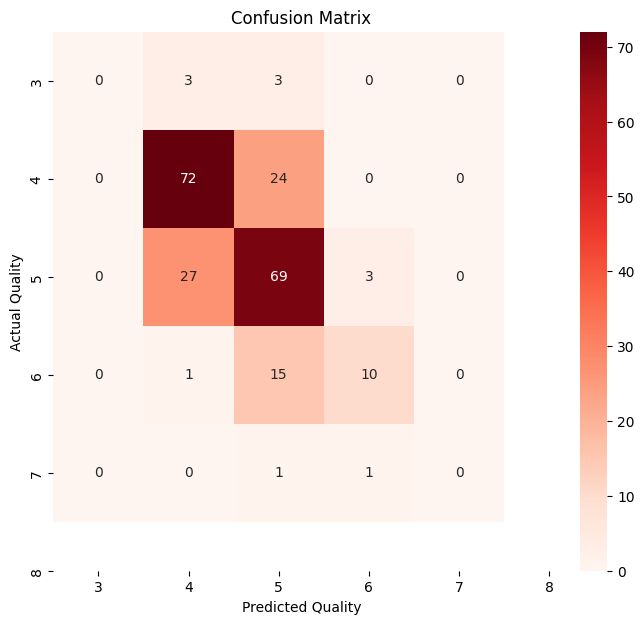

In [17]:
plt.figure(figsize=(8,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Confusion Matrix')
plt.show()